In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
#Read data as dataframe
df = pd.read_csv('../data/vertebral_column_data/column_2C.dat', header=None)
df.columns = ['style']
df1 = df['style'].str.split(' ', expand=True)
df1.columns = ['pelvic incidence','pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'classes']

#Classes as binary
df1 = df1.replace({'NO':'0', 'AB' : '1'})

#convert df to numeric
df1 = df1.apply(pd.to_numeric, errors='ignore')
df1

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,classes
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


Plotting scatterplots of independent variables

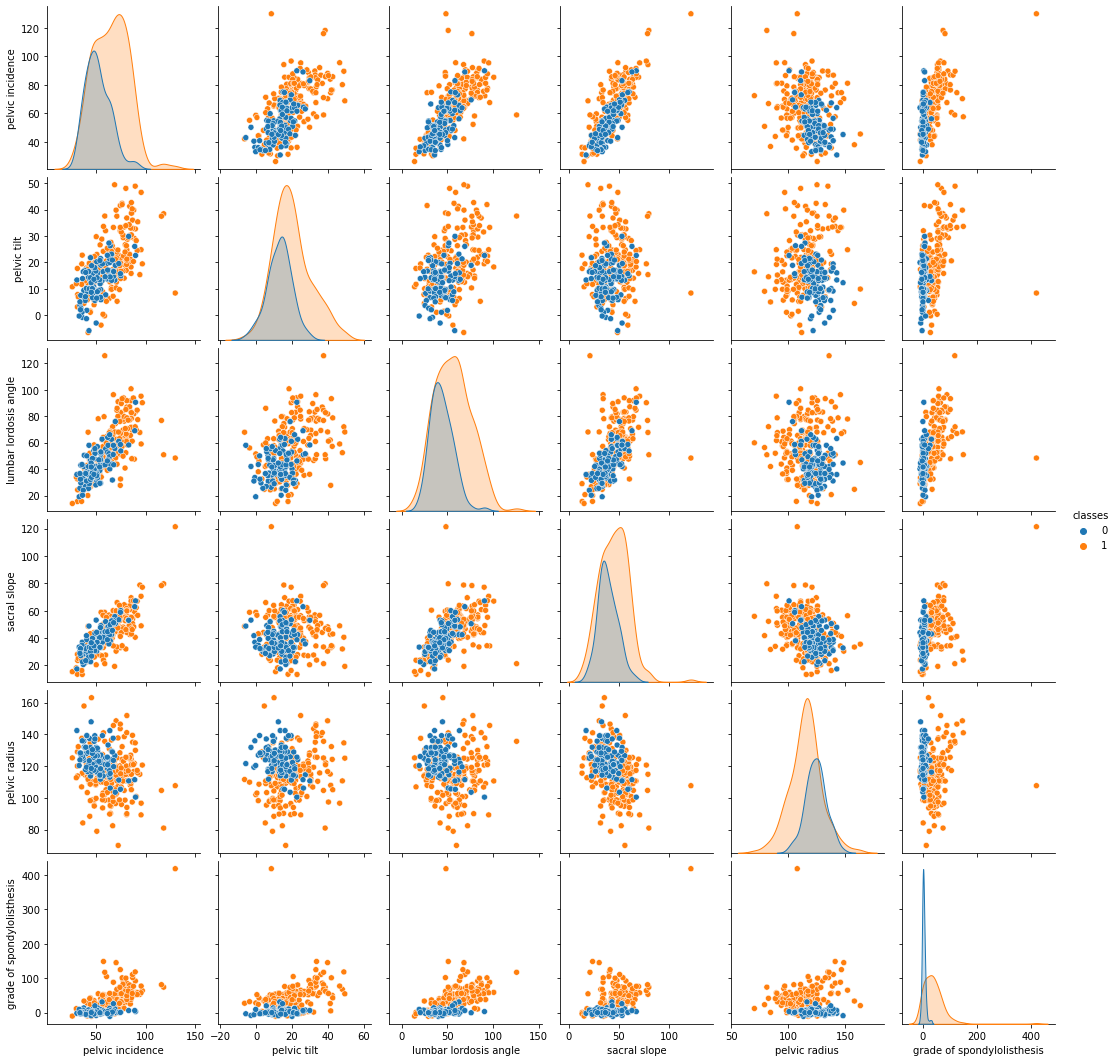

In [13]:
pairplot_fig = sns.pairplot(df1, vars=df1.columns[0:-1], hue = 'classes')
plt.show()

Plotting boxplots for each independent variables

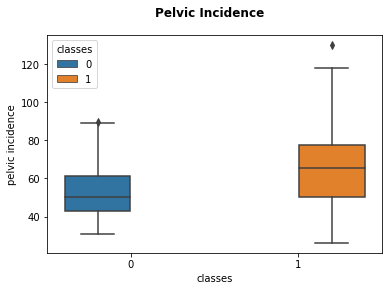

In [15]:
fig = plt.figure()
fig.suptitle('Pelvic Incidence', fontweight = 'bold')
sns.boxplot(y = 'pelvic incidence', x = 'classes', data = df1, hue = 'classes')
plt.show()

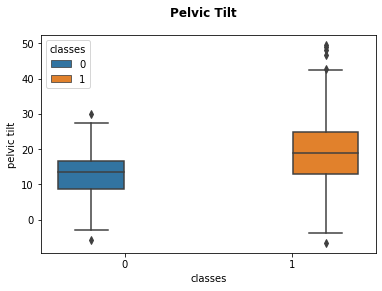

In [21]:
fig = plt.figure()
fig.suptitle('Pelvic Tilt', fontweight = 'bold')
sns.boxplot(y = 'pelvic tilt', x = 'classes', data = df1, hue = 'classes')
plt.show()

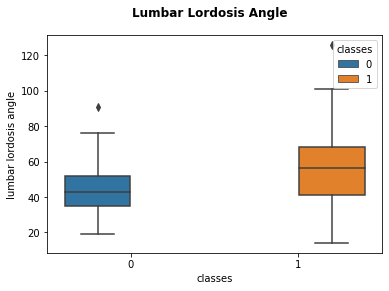

In [22]:
fig = plt.figure()
fig.suptitle('Lumbar Lordosis Angle', fontweight = 'bold')
sns.boxplot(y = 'lumbar lordosis angle', x = 'classes', data = df1, hue = 'classes')
plt.show()

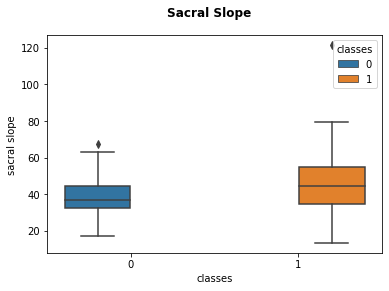

In [23]:
fig = plt.figure()
fig.suptitle('Sacral Slope', fontweight = 'bold')
sns.boxplot(y = 'sacral slope', x = 'classes', data = df1, hue = 'classes')
plt.show()

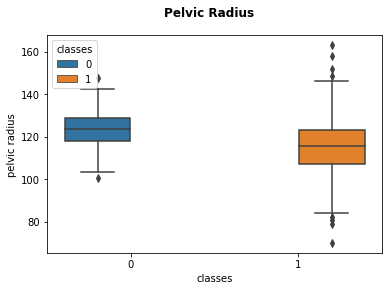

In [24]:
fig = plt.figure()
fig.suptitle('Pelvic Radius', fontweight = 'bold')
sns.boxplot(y = 'pelvic radius', x = 'classes', data = df1, hue = 'classes')
plt.show()

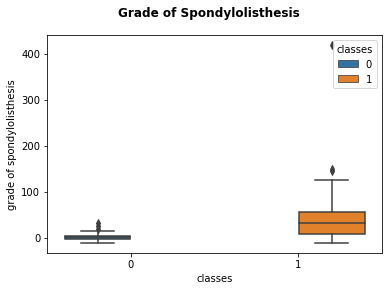

In [25]:
fig = plt.figure()
fig.suptitle('Grade of Spondylolisthesis', fontweight = 'bold')
sns.boxplot(y = 'grade of spondylolisthesis', x = 'classes', data = df1, hue = 'classes')
plt.show()

Splitting training set: first 80 rows of Class 0 and first 150 rows of class 1

In [44]:
#Training set
df_cls0 = df1.loc[df1['classes']==0]
df_cls1 = df1.loc[df1['classes']==1]

train_cls0 = df_cls0.iloc[:80]
train_cls1 = df_cls1.iloc[:150]
traindf = pd.concat([train_cls0, train_cls1])

#Testing set
test_cls0 = df_cls0.iloc[80:]
test_cls1 = df_cls1.iloc[150:]
testdf = pd.concat([test_cls0, test_cls1])

traindata = traindf.values
testdata = testdf.values

X_train, y_train = traindata[:, :-1], traindata[:, -1]
X_test, y_test = testdata[:, :-1], testdata[:, -1]

Practicing Classification using KNN with Euclidean Distance

In [43]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9375

Most Suitable k  100
True Positive Rate:  0.8947368421052632
True Negative Rate:  0.9508196721311475


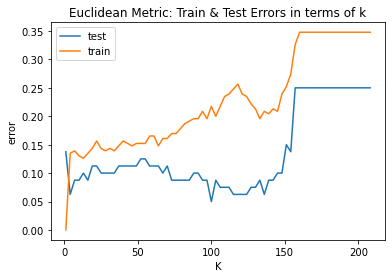

In [52]:
test_k = []
for i in range(208, 0, -3): 
    test_k.append(i) 
    
error = []
error_train = []
for i in test_k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    pred_tr_i = knn.predict(X_train)
    error_train.append(np.mean(pred_tr_i != y_train))


error_result= {'k':test_k, 'error': error, 'error_train': error_train}
firstdf = pd.DataFrame(data = error_result)

#Plotting train and test errors in terms of k
plt.plot(firstdf['k'],firstdf['error'],label = "test")
plt.plot(firstdf['k'],firstdf['error_train'],label = "train")
plt.legend()
plt.xlabel("K")
plt.ylabel("error")
plt.title("Euclidean Metric: Train & Test Errors in terms of k")

#Confusion Matrix
y_pred = clf.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred)
min_error = firstdf['error'].min()
print('Most Suitable k ', firstdf.loc[firstdf['error'] == min_error, 'k'].item())

FP =   c_matrix.item(0,1)
FN = c_matrix.item(1,0)
TP = c_matrix.item(0,0)
TN = c_matrix.item(1,1)
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
print('True Positive Rate: ', TPR )
print('True Negative Rate: ', TNR)

In [49]:
print('Classificationn Report: ', '\n', classification_report(y_test, y_pred))

Classificationn Report:  
               precision    recall  f1-score   support

         0.0       0.89      0.85      0.87        20
         1.0       0.95      0.97      0.96        60

    accuracy                           0.94        80
   macro avg       0.92      0.91      0.92        80
weighted avg       0.94      0.94      0.94        80

